# **IMPORT LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import numpy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from keras.layers import Input
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

C:\Users\alice\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


### **LOAD THE DATA**

In [2]:
# Load the Excel File
df = pd.read_excel("averagemonthlyuniform_my.xlsx")

In [3]:
# Printing the first five Rows
df.head()

Year    Forecast
0  2005-01   78.558555
1  2005-02   83.554807
2  2005-03   97.742641
3  2005-04   99.754056
4  2005-05  113.538985

In [4]:
# Changing the Year column data type from object to Date Time
df['Year']= pd.to_datetime(df['Year'])


In [5]:
# Setting the Year Column as Index
df.set_index("Year", inplace = True)


In [6]:
# Shape of Dataset
df.shape

(204, 1)

In [7]:
# Plotting the forecast column
df1=df[['Forecast']]

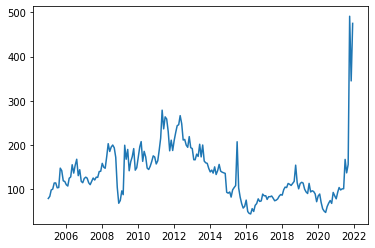

In [8]:
# Plotting the Forecast Column
plt.plot(df1)

In [9]:
# Scaline the Forecast Column values from 0 to 1
scaler=MinMaxScaler(feature_range=(0,1))
# Reshaping the Data
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [10]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.6)
# Test Size
test_size=len(df1)-training_size
# Train data and Test Data
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [11]:
# Size of Training Data and Test Data
training_size,test_size


(122, 82)

In [12]:
# convert an array of values into a dataset matrix
def traintestdataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]  
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [13]:
# Considering the previous 40 time steps
time_step = 40
# Creating an Training Data and Testing Data
X_train, y_train = traintestdataset(train_data, time_step)
X_test, ytest = traintestdataset(test_data, time_step)


In [14]:
# Training Size of Independent and Dependent Columns
print(X_train.shape), print(y_train.shape)


(81, 40)
(81,)


(None, None)

In [15]:
# Testing Size of Independent and Dependent Columns
print(X_test.shape), print(ytest.shape)


(41, 40)
(41,)


(None, None)

In [16]:
# Reshaping the Trainbing Dataset
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
# Reshaping the Testing Dataset
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [17]:
# Importing the Sequential Model
model=Sequential()
# Defining the input shape of LSTM Layer
model.add(LSTM(50,return_sequences=True,input_shape=(40,1)))
# Defining the Hidden Layer
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
# Defining the Output Layer
model.add(Dense(1))
# Compiling the Model using the Mean Squared Loss as the Loss Function and Adam Optimizer
model.compile(loss='mean_squared_error',optimizer='adam')

In [18]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 40, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 40, 50)            20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Training the Model with 100 epochs and batch size of 64 and Testing the model on test dataset and evaluating the Valdidation Loss
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)


Train on 81 samples, validate on 41 samples
Epoch 1/100
81/81 [==============================] - 6s 69ms/sample - loss: 0.0972 - val_loss: 0.0379
Epoch 2/100
81/81 [==============================] - 0s 2ms/sample - loss: 0.0481 - val_loss: 0.0296
Epoch 3/100
81/81 [==============================] - 0s 2ms/sample - loss: 0.0136 - val_loss: 0.0395
Epoch 4/100
81/81 [==============================] - 0s 1ms/sample - loss: 0.0194 - val_loss: 0.0411
Epoch 5/100
81/81 [==============================] - 0s 1ms/sample - loss: 0.0186 - val_loss: 0.0334
Epoch 6/100
81/81 [==============================] - 0s 1ms/sample - loss: 0.0093 - val_loss: 0.0300
Epoch 7/100
81/81 [==============================] - 0s 1ms/sample - loss: 0.0098 - val_loss: 0.0293
Epoch 8/100
81/81 [==============================] - 0s 1ms/sample - loss: 0.0121 - val_loss: 0.0292
Epoch 9/100
81/81 [==============================] - 0s 1ms/sample - loss: 0.0119 - val_loss: 0.0296
Epoch 10/100
81/81 [==========================

Epoch 81/100
81/81 [==============================] - 0s 1ms/sample - loss: 0.0068 - val_loss: 0.0326
Epoch 82/100
81/81 [==============================] - 0s 2ms/sample - loss: 0.0068 - val_loss: 0.0323
Epoch 83/100
81/81 [==============================] - 0s 1ms/sample - loss: 0.0068 - val_loss: 0.0329
Epoch 84/100
81/81 [==============================] - 0s 1ms/sample - loss: 0.0067 - val_loss: 0.0330
Epoch 85/100
81/81 [==============================] - 0s 1ms/sample - loss: 0.0067 - val_loss: 0.0326
Epoch 86/100
81/81 [==============================] - 0s 1ms/sample - loss: 0.0067 - val_loss: 0.0330
Epoch 87/100
81/81 [==============================] - 0s 1ms/sample - loss: 0.0068 - val_loss: 0.0332
Epoch 88/100
81/81 [==============================] - 0s 2ms/sample - loss: 0.0066 - val_loss: 0.0319
Epoch 89/100
81/81 [==============================] - 0s 2ms/sample - loss: 0.0071 - val_loss: 0.0325
Epoch 90/100
81/81 [==============================] - 0s 2ms/sample - loss: 0.0067

In [20]:
# Train and Test Prediction
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [21]:
#Accuracy Score
r2_score(ytest, test_predict)

-0.17603447375774173

In [22]:
# Calculating the Mean Sqaured Error for the Training Set
math.sqrt(mean_squared_error(y_train,train_predict))

0.08386633862049389

In [23]:
# Calculating the Mean Sqaured Error for the Test Set
math.sqrt(mean_squared_error(ytest,test_predict))


0.18354163909517013

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(mean_absolute_error(y_train,train_predict))
print(mean_absolute_error(ytest,test_predict))


0.06226602212403445
0.1360805836261414


In [25]:
# Transforming the Data into the Orignal Form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

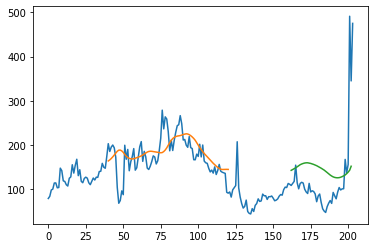

In [26]:
# look back to 40
look_back=40
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# Doing predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [27]:
len(test_data)


82

In [28]:
# Setting the Input Shape
x_input=test_data[42:].reshape(1,-1)
x_input.shape

(1, 40)

In [29]:
# Crating an List
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [30]:
temp_input

[0.16469380617882753,
 0.2466718457066627,
 0.15773516773312804,
 0.12696857653671456,
 0.1540679544377261,
 0.15987128146698373,
 0.15622608544321867,
 0.1251422580419511,
 0.11096394582044297,
 0.10329242808141259,
 0.1543926747176428,
 0.11096756399915961,
 0.11697633344647457,
 0.11345807201131375,
 0.10095249185266836,
 0.06173251401372776,
 0.09056803218427908,
 0.1005997937689799,
 0.05833519433079523,
 0.025969955157388994,
 0.014219311741246868,
 0.007383386103719303,
 0.036737655017808235,
 0.05427426163695573,
 0.06776739590187938,
 0.05324663882869993,
 0.10871593084824543,
 0.09178249413829156,
 0.07641283126698778,
 0.11014566692929695,
 0.13346823675144978,
 0.12120378193117975,
 0.1266769903664551,
 0.127347179154448,
 0.2757493164423419,
 0.20768047520852997,
 0.2502151236198126,
 1.0,
 0.6728585129544004,
 0.9638544847009165]

In [31]:
# Doing Predictions for the Next 30 Months
from numpy import array

lst_output=[]
n_steps=40
i=0
while(i<30):
    
    if(len(temp_input)>40):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} Month input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} Month output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.30999637]
41
1 Month input [0.24667185 0.15773517 0.12696858 0.15406795 0.15987128 0.15622609
 0.12514226 0.11096395 0.10329243 0.15439267 0.11096756 0.11697633
 0.11345807 0.10095249 0.06173251 0.09056803 0.10059979 0.05833519
 0.02596996 0.01421931 0.00738339 0.03673766 0.05427426 0.0677674
 0.05324664 0.10871593 0.09178249 0.07641283 0.11014567 0.13346824
 0.12120378 0.12667699 0.12734718 0.27574932 0.20768048 0.25021512
 1.         0.67285851 0.96385448 0.30999637]
1 Month output [[0.35024443]]
2 Month input [0.15773517 0.12696858 0.15406795 0.15987128 0.15622609 0.12514226
 0.11096395 0.10329243 0.15439267 0.11096756 0.11697633 0.11345807
 0.10095249 0.06173251 0.09056803 0.10059979 0.05833519 0.02596996
 0.01421931 0.00738339 0.03673766 0.05427426 0.0677674  0.05324664
 0.10871593 0.09178249 0.07641283 0.11014567 0.13346824 0.12120378
 0.12667699 0.12734718 0.27574932 0.20768048 0.25021512 1.
 0.67285851 0.96385448 0.30999637 0.35024443]
2 Month output [[0.38684586]]
3 Month i

21 Month output [[0.47768852]]
22 Month input [0.03673766 0.05427426 0.0677674  0.05324664 0.10871593 0.09178249
 0.07641283 0.11014567 0.13346824 0.12120378 0.12667699 0.12734718
 0.27574932 0.20768048 0.25021512 1.         0.67285851 0.96385448
 0.30999637 0.35024443 0.38684586 0.41765589 0.44280821 0.46303102
 0.47897226 0.49134043 0.50069749 0.50763994 0.51259518 0.51605833
 0.51788306 0.51839179 0.51762849 0.51560646 0.51225096 0.50783366
 0.50227356 0.49535692 0.48713019 0.47768852]
22 Month output [[0.46706364]]
23 Month input [0.05427426 0.0677674  0.05324664 0.10871593 0.09178249 0.07641283
 0.11014567 0.13346824 0.12120378 0.12667699 0.12734718 0.27574932
 0.20768048 0.25021512 1.         0.67285851 0.96385448 0.30999637
 0.35024443 0.38684586 0.41765589 0.44280821 0.46303102 0.47897226
 0.49134043 0.50069749 0.50763994 0.51259518 0.51605833 0.51788306
 0.51839179 0.51762849 0.51560646 0.51225096 0.50783366 0.50227356
 0.49535692 0.48713019 0.47768852 0.46706364]
23 Month out

In [32]:
day_new=np.arange(1,41)
day_pred=np.arange(41,71)

In [33]:
import matplotlib.pyplot as plt


In [34]:
len(df1)


204

In [35]:
df1

array([[0.07808508],
       [0.08924651],
       [0.12094161],
       [0.12543503],
       [0.15623005],
       [0.15674968],
       [0.1322048 ],
       [0.13358695],
       [0.23154058],
       [0.21880582],
       [0.16716809],
       [0.16441956],
       [0.14774715],
       [0.1409617 ],
       [0.18025672],
       [0.18714968],
       [0.24879581],
       [0.20657668],
       [0.24633042],
       [0.27657392],
       [0.19355628],
       [0.22350873],
       [0.16469992],
       [0.15780912],
       [0.17931406],
       [0.18597607],
       [0.18092927],
       [0.15763951],
       [0.1479351 ],
       [0.16514428],
       [0.18162809],
       [0.17149666],
       [0.18580643],
       [0.1849221 ],
       [0.21444324],
       [0.21568877],
       [0.25575287],
       [0.23612095],
       [0.23091944],
       [0.29004531],
       [0.35532029],
       [0.31588776],
       [0.33829225],
       [0.34853803],
       [0.33419346],
       [0.28628805],
       [0.13407372],
       [0.053

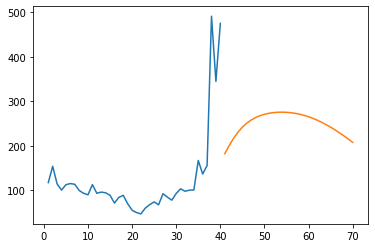

In [36]:
# Prediction Plot for the Next 30 Months, Orange Line show the prediction for the Next 30 Months
plt.plot(day_new,scaler.inverse_transform(df1[164:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

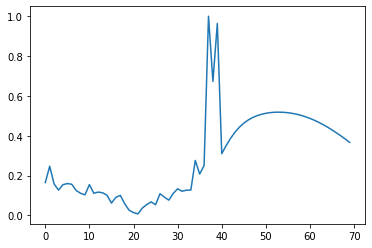

In [37]:
# Integrating the Orignal Line with the Orignal Line
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[164:])

In [38]:
# Overall Prediction Plot for the Next 30 months
df3=scaler.inverse_transform(df3).tolist()


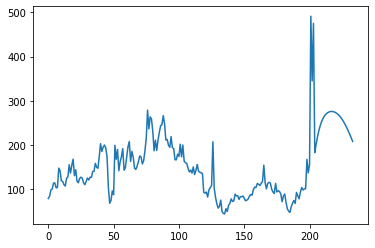

In [39]:
plt.plot(df3)
